In [12]:
!pip install tensorflow_addons

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [10]:
!pip install imblearn


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [13]:
import pandas as pd
import numpy as np
import os
import sys
import logging
import matplotlib.pyplot as plt
from random import randint
import tensorflow as tf
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D



print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.3.1


In [2]:
module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"\\model")



logging.basicConfig(filename='../logs/preprocessnotebook.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.DEBUG)

In [3]:
from load_data import PREP

In [4]:
load_Instance=PREP()
train_data_gen,classes=load_Instance.pre_process()

 ================ Folder found ================= 

 ==== Contents of train directory ========= 
 ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'] 

 ==== Contents of test directory ========= 
 ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'] 

================ Creating new working tree ================
========= Creating directory ========= 

 ============ new directory contains ======== 

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
Found 6400 images belonging to 4 classes.


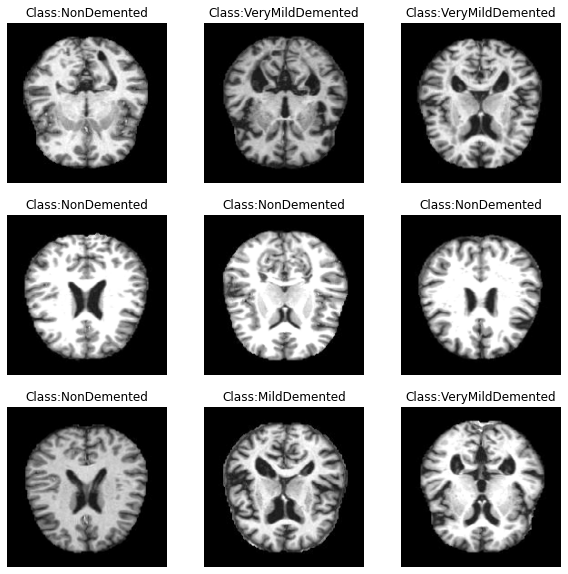

In [14]:
def show_images(generator,y_pred=None):
    """
    Input: An image generator,predicted labels (optional)
    Output: Displays a grid of 9 images with lables
    """
    
    # get image lables
    labels =dict(zip([0,1,2,3], classes))
    
    # get a batch of images
    x,y = generator.next()
    
    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, 6400)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))
                                                     
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))
    
# Display Train Images
show_images(train_data_gen)

In [15]:
train_data, train_labels = train_data_gen.next()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [20]:
X_train, X_train, y_train, y_train = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)